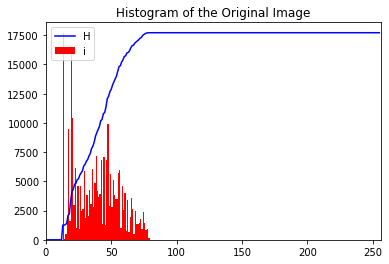

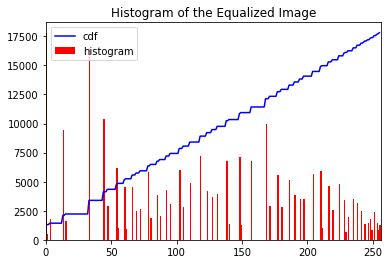

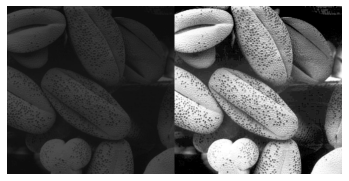

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
hist,bins =np.histogram(img.ravel(),256,[0,256])
cdf =hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('Histogram'),loc='upper left')
plt.title("Histogram of the Original Image")
plt.show()
equ =cv.equalizeHist(img)
hist,bins =np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf* hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(equ.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title( "Histogram of the Equalized Image")
plt.show()
res=np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap='gray')


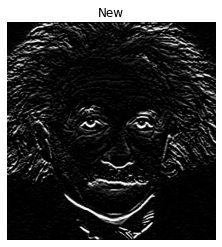

In [12]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("einstein.png",cv.IMREAD_COLOR)
img =cv.cvtColor(img,cv.COLOR_BGR2RGB)

sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
im_x=cv.filter2D(img,-1,sobel)
fig,ax=plt.subplots()
ax.imshow(im_x)
ax.set_title("New")
plt.axis("off")
plt.show()


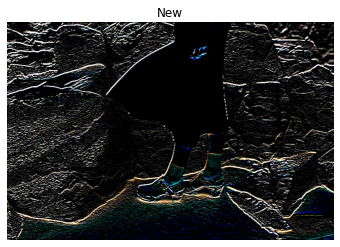

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
img =cv.cvtColor(img,cv.COLOR_BGR2RGB)

sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
im_x=cv.filter2D(img,-1,sobel)
fig,ax=plt.subplots()
ax.imshow(im_x)
ax.set_title("New")
plt.axis("off")
plt.show()

In [2]:
import cv2 as cv
import numpy as np
import math

img = cv.imread('highlights_and_shadows.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


mid = 0.5
mean = np.mean(gray)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)


img_gamma1 = np.power(img, gamma).clip(0,255).astype(np.uint8)


hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, sat, val = cv.split(hsv)


mid = 0.5
mean = np.mean(val)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)


val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)


hsv_gamma = cv.merge([hue, sat, val_gamma])
img_gamma2 = cv.cvtColor(hsv_gamma, cv.COLOR_HSV2BGR)

# show results
cv.imshow('input', img)
cv.imshow('result1', img_gamma1)
cv.imshow('result2', img_gamma2)
cv.waitKey(0)
cv.destroyAllWindows()

# save results
cv.imwrite('highlights_and_shadows.jpg', img_gamma1)
cv.imwrite('lioncuddle1_gamma2.jpg', img_gamma2)

1.0340447024854804
1.0163660561606105


True

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


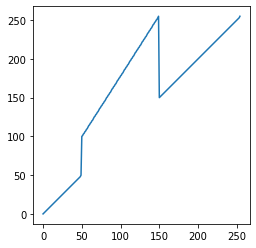

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
f = cv.imread('emma_gray2.jpg',cv.IMREAD_GRAYSCALE)
#assert f is not None
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(150,255,105)
t=np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
fig,ax =plt.subplots()
ax.plot(t)
ax.set_aspect("equal")
#assert len(t) == 256
#g=cv.LUT(f,t)
g = t[f]



cv.namedWindow("image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",f)
cv.waitKey(0)
cv.imshow("Image",g)
cv.waitKey(0)
cv.destroyAllWindows()